In [1]:
import os
import numpy as np
import argparse
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics

from utils.utilities import (create_folder, get_filename, d_prime)
import utils.config as config

In [2]:
# adapted from https://github.com/qiuqiangkong/audioset_tagging_cnn/blob/master/utils/plot_for_paper.py
def load_statistics(statistics_path):
    statistics_dict = pickle.load(open(statistics_path, 'rb'))

    bal_map = np.array([statistics['average_precision'] for statistics in statistics_dict['bal']])    # (N, classes_num)
    bal_map = np.mean(bal_map, axis=-1)
    test_map = np.array([statistics['average_precision'] for statistics in statistics_dict['test']])    # (N, classes_num)
    test_map = np.mean(test_map, axis=-1)

    return bal_map, test_map

def crop_label(label):
    max_len = 16
    if len(label) <= max_len:
        return label
    else:
        words = label.split(' ')
        cropped_label = ''
        for w in words:
            if len(cropped_label + ' ' + w) > max_len:
                break
            else:
                cropped_label += ' {}'.format(w)
    return cropped_label

def add_comma(integer):
    """E.g., 1234567 -> 1,234,567
    """
    integer = int(integer)
    if integer >= 1000:
        return str(integer // 1000) + ',' + str(integer % 1000)
    else:
        return str(integer)

In [3]:
# Paths
save_out_path = 'E:/ship/copy_results/classwise_iteration_map.pdf'
create_folder(os.path.dirname(save_out_path))

def Load_statistics(path):
    statistics_dict = pickle.load(open(path, 'rb'))

    mAP_mat = np.array([e['average_precision'] for e in statistics_dict['validate']])
    sorted_indexes = np.argsort(config.full_samples_per_class)[::-1]
    return mAP_mat, sorted_indexes

In [4]:
def draw(paths,title=None):
    n = len(paths)
    fig, axs = plt.subplots(1, n, figsize=(15, 5))
    ranges = [np.arange(0, 4) for _ in range(n)]
    axs[0].set_ylabel('AP')
    for col in range(n):
        mAP_mat, sorted_indexes = Load_statistics(paths[col])
        axs[col].set_ylim(0, 1.)
        #axs[col].set_xlim(0, len(mAP_mat))
        axs[col].set_xlabel('Iterations')
        axs[col].set_ylabel('AP')
        axs[col].xaxis.set_ticks(np.arange(0, 10000//20+1, 100))
        axs[col].xaxis.set_ticklabels(['0', '2k', '4k', '6k', '8k', '10k'])
        lines = []
        for _ix in ranges[col]:
            if col == (n-1):
                _label = crop_label(config.labels[sorted_indexes[_ix]]) + \
                    ' ({})'.format(add_comma(config.full_samples_per_class[sorted_indexes[_ix]]))
                line, = axs[col].plot(mAP_mat[:, sorted_indexes[_ix]], label=_label)
            else:
                line, = axs[col].plot(mAP_mat[:, sorted_indexes[_ix]])
            lines.append(line)
        box = axs[col].get_position()
        axs[col].set_position([box.x0, box.y0, box.width * 1., box.height])
        if col == (n-1):
            axs[col].legend(handles=lines, bbox_to_anchor=(1.5, 0.3))
        axs[col].yaxis.grid(color='k', linestyle='solid', alpha=0.3, linewidth=0.3)
        if title:
            axs[col].set_title('{}'.format(title[col]))

    plt.tight_layout(pad=4, w_pad=1, h_pad=1)
    plt.savefig(save_out_path)
    print(save_out_path)

In [7]:
root_path = 'E:/ship/statistics/main/holdout_fold=1/'
paths = [root_path+'Cnn14/pretrain=False/loss_type=clip_bce/augmentation=none/batch_size=16/freeze_base=False/statistics_2023-03-08_10-22-07.pkl',
        root_path+'Cnn10/pretrain=False/loss_type=clip_bce/augmentation=none/batch_size=16/freeze_base=False/statistics_2023-03-08_15-43-39.pkl',
        root_path+'Cnn6/pretrain=False/loss_type=clip_bce/augmentation=none/batch_size=16/freeze_base=False/statistics_2023-03-08_13-40-24.pkl',
        root_path+'ResNet52/pretrain=False/loss_type=clip_bce/augmentation=none/batch_size=16/freeze_base=False/statistics_2023-03-10_08-40-47.pkl',
         root_path+'ResNet38/pretrain=False/loss_type=clip_bce/augmentation=none/batch_size=16/freeze_base=False/statistics_2023-03-09_13-43-39.pkl',
        root_path+'ResNet22/pretrain=False/loss_type=clip_bce/augmentation=none/batch_size=16/freeze_base=False/statistics_2023-03-09_16-42-14.pkl']
titles = ['Cnn14','Cnn10','Cnn6','ResNet52','ResNet38','ResNet22']

E:/ship/copy_results/classwise_iteration_map.pdf
E:/ship/copy_results/classwise_iteration_map.pdf


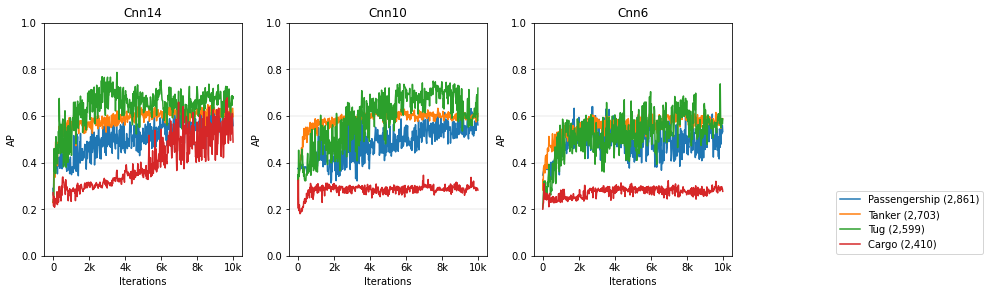

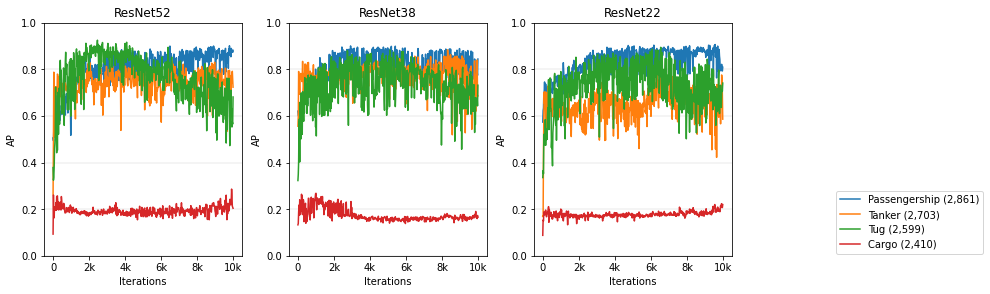

In [8]:
draw(paths[:3],titles[:3])
draw(paths[-3:],titles[-3:])